In [466]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
sns.set_context("paper")
sns.set_theme(style="white")

# Cours en LOG
## Cours du blé

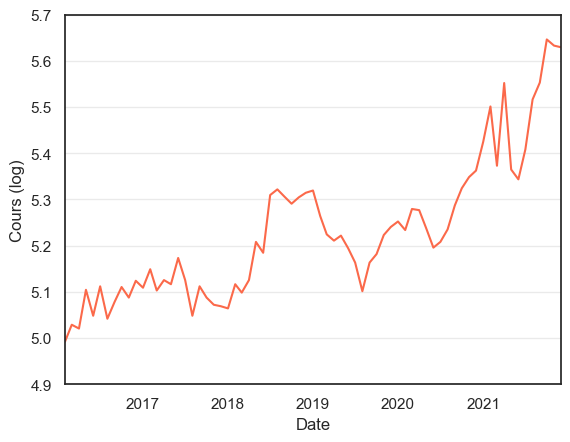

In [484]:
dates = pd.date_range(start="2016-01-01", end='2021-12-01', freq="MS")
ble = pd.read_csv("data/ble.csv", usecols=["ble"], skipfooter=12, engine="python")
ble = ble.set_index(dates)

ax, fig = plt.subplots()
ax = sns.lineplot(np.log(ble), palette="Reds", legend=False)
ax.set(xlim=(dates[1], dates[-1]), ylim=(4.9, 5.7), xlabel='Date', ylabel='Cours (log)')
ax.grid(axis='y', alpha=0.4)
ax.grid(axis='x', alpha=0)

#plt.savefig('../rendu/graphs/ble_log.pgf')

## Cours du nickel

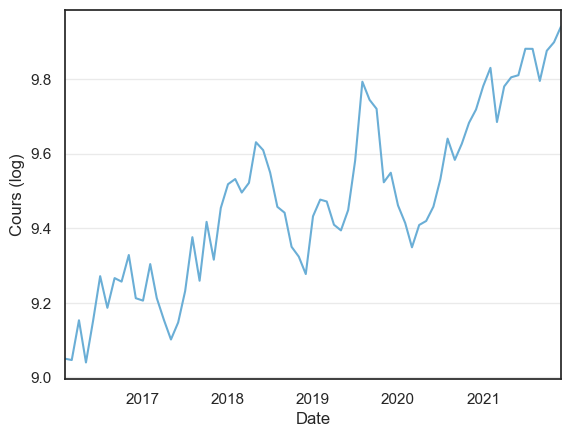

In [468]:
nickel = pd.read_csv("data/nickel.csv", usecols=["nickel"])
nickel = nickel.set_index(dates)

ax, fig = plt.subplots()
ax = sns.lineplot(np.log(nickel),palette="Blues", legend=False)
ax.set(xlim=(dates[1], dates[-1]), xlabel='Date', ylabel='Cours (log)')
ax.grid(axis='y', alpha=0.4)
ax.grid(axis='x', alpha=0)
#plt.savefig('../rendu/graphs/nickel_log.pgf')

['#fedbcc', '#fcaf93', '#fc8161', '#f44f39', '#d52221', '#aa1016']
['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f']


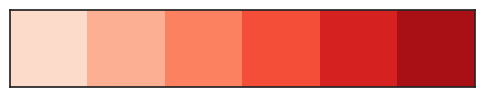

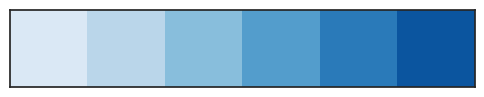

In [469]:
pal = sns.color_palette("Reds")
sns.palplot(pal)
print(sns.color_palette("Reds").as_hex())
sns.palplot(sns.color_palette("Blues"))
print(sns.color_palette("Blues").as_hex())

## Saisonnalité de Nickel 21

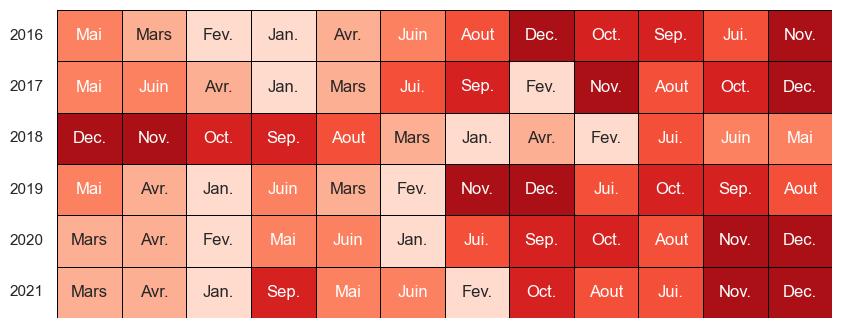

In [470]:
nickel_21 = pd.read_csv("data/nickel_21_bb.csv", index_col=["Annee"])


for i in range(6):
    nickel_21.iloc[i] = nickel_21.iloc[i].sort_values().index

month_dict = {'Jan.': 1, 'Fev.': 2, 'Mars': 3, 'Avr.': 4, 'Mai': 5, 'Juin': 6, 'Jui.': 7, 'Aout': 8, 'Sep.': 9, 'Oct.': 10, 'Nov.': 11, 'Dec.': 12}
df = nickel_21.replace(month_dict)

fig, ax = plt.subplots(figsize=(10,4))

ax = sns.heatmap(df, annot=nickel_21, fmt='',cmap=pal,linewidth=.5, linecolor='black',  cbar=None)
ax.set(xlabel="", ylabel="")
ax.tick_params(axis='x', which='major', bottom=False, top = False, labeltop=False, labelbottom=False)
ax.tick_params(axis='y', rotation=0, left = False)
#plt.savefig('../rendu/graphs/nickel_bbc.pgf')

# Producteurs de blé

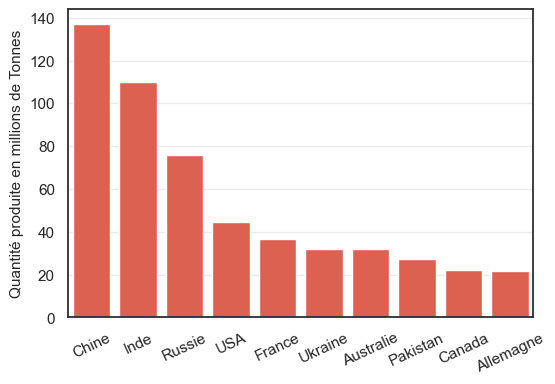

In [471]:

prod_ble = pd.read_csv("data/ble_prod.csv")
prod_ble['quantite'] = prod_ble['quantite']/1000000
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x= 'pays', y='quantite', data=prod_ble, color='#f44f39')
ax.set_ylabel("Quantité produite en millions de Tonnes" ,fontsize=11)
ax.set_xlabel("")
ax.tick_params(axis='x', rotation=25, left = False)
plt.ticklabel_format(style='plain', axis='y')
ax.grid(axis='y', alpha=0.4)
plt.savefig('../rendu/graphs/ble_prod.pgf',  bbox_inches = 'tight')


# Cours du blé 2003 - 2023

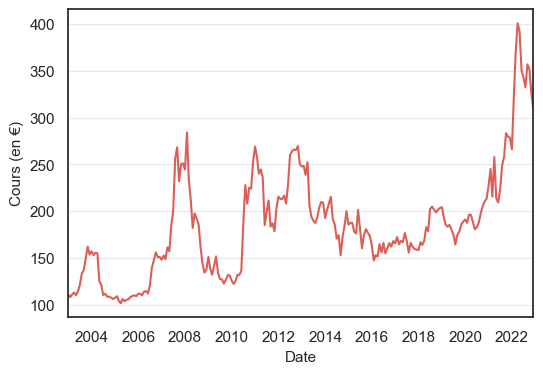

In [472]:
dates_ble  = pd.date_range(start='2003-01-01', end='2022-12-01', freq="MS")
ble = pd.read_csv("data/ble_hist.csv", usecols=['ble'])
ble = ble.set_index(dates_ble)

ax, fig = plt.subplots(figsize=(6,4))
ax = sns.lineplot(ble, palette="hls", legend=False)
ax.set(xlim=(dates_ble[0], dates_ble[-1]))
ax.set_ylabel("Cours (en €)" ,fontsize=11)
ax.set_xlabel("Date",fontsize=11)
ax.grid(axis='y', alpha=0.4)
ax.grid(axis='x', alpha=0)
#plt.savefig('../rendu/graphs/ble.pgf',  bbox_inches = 'tight')


# Rendement du blé 2003 - 2022

In [473]:
rendement_ble = ble.apply(np.log).diff()

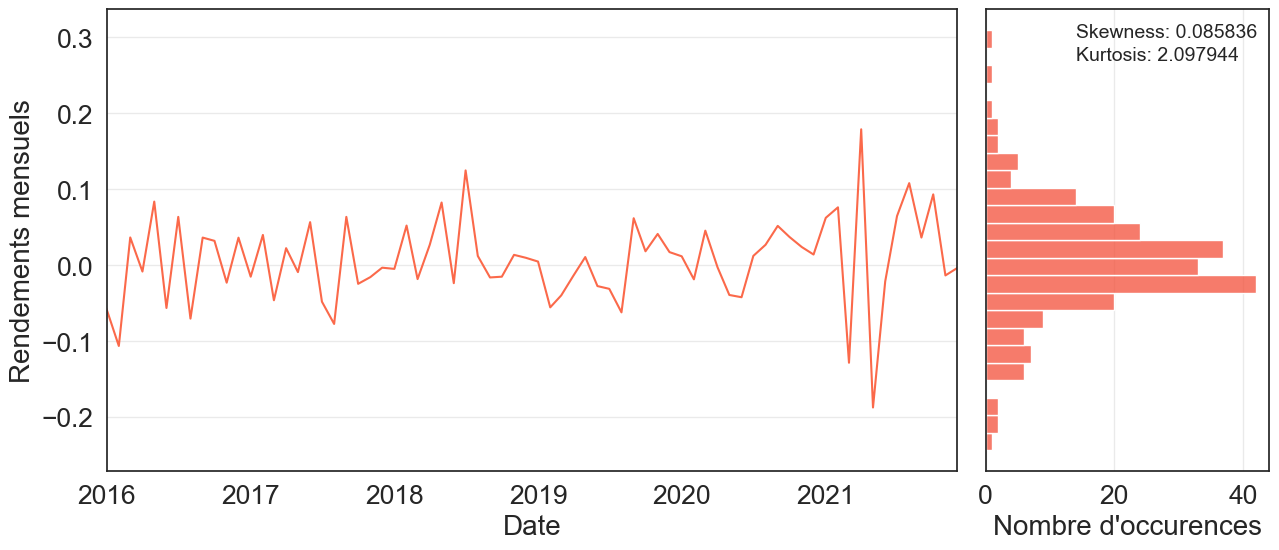

In [474]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6),gridspec_kw={'width_ratios': [3, 1]})
sns.lineplot(rendement_ble,legend=False,palette='Reds',ax=axs[0])
axs[0].set_xlabel("Date",fontsize=20)
axs[0].set_ylabel("Rendements mensuels" ,fontsize=20)
axs[0].grid(axis='y', alpha=0.4)
axs[0].grid(axis='x', alpha=0)
axs[0].set(xlim=(dates[0], dates[-1]))
sns.histplot(data=rendement_ble,y='ble',legend=False,color='#f44f39', stat='count',ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Nombre d'occurences",fontsize=20)
axs[1].set_yticks([])
axs[1].grid(axis='x', alpha=0.4)
axs[1].text(x=14, y=0.30, s="Skewness: %f" % rendement_ble.skew(), fontsize=14)
axs[1].text(x=14, y=0.27, s="Kurtosis: %f" % rendement_ble.kurt(),fontsize=14)
axs[1].tick_params(labelsize=19)
axs[0].tick_params(labelsize=19)
plt.subplots_adjust(wspace=0.05)
#plt.savefig('../rendu/graphs/ble_rendement.pgf',  bbox_inches = 'tight')

# Utilisations du nickel

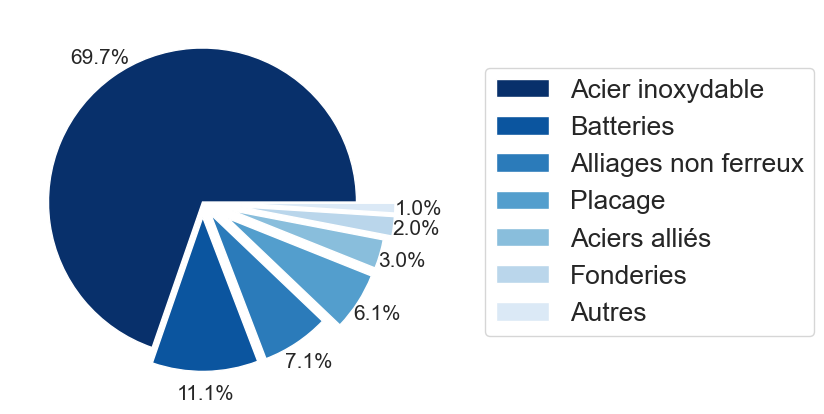

In [475]:
# Source : https://nickelinstitute.org/en/about-nickel-and-its-applications/

labels = ['Acier inoxydable','Batteries','Alliages non ferreux', 'Placage','Aciers alliés', 'Fonderies', 'Autres']
sizes = [69,11, 7,6,3,2,1]
cmap = plt.get_cmap('Blues_r')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = (0, 0.1,0.1,0.2,0.2,0.25,0.25)
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(sizes, labels=labels,autopct='%1.1f%%',labeldistance=None,colors=colors, explode=explode,pctdistance=1.15,  textprops=dict(fontsize=15))
ax.legend(labels, loc="center left", bbox_to_anchor=(1.2, 0.5),fontsize=19)
#plt.savefig('../rendu/graphs/nickel_utilisation.pgf',  bbox_inches = 'tight')

# Reserves de nickel

In [1]:
prod_nickel = pd.read_csv("data/nickel_prod.csv")
prod_nickel['prod'] = prod_nickel['prod']/1000
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x= 'pays', y='prod', data=prod_nickel, color='b')
ax.set_ylabel("Quantité produite en millier de Tonnes" ,fontsize=11)
ax.set_xlabel("")
ax.tick_params(axis='x', rotation=90, left = False,direction="in",width=200)
plt.ticklabel_format(style='plain', axis='y')
ax.grid(axis='y', alpha=0.4)
plt.savefig('../rendu/graphs/ble_prod.pgf',  bbox_inches = 'tight')


NameError: name 'pd' is not defined

# Cours du nickel 2006-2022

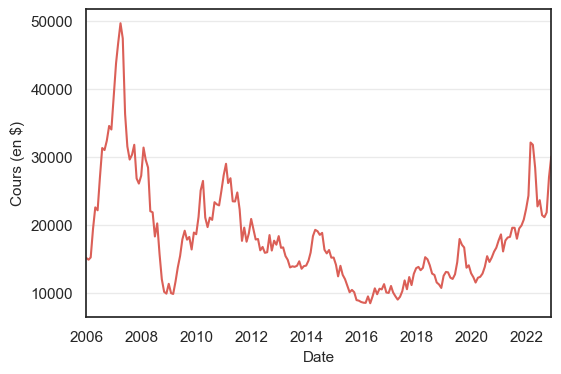

In [477]:
dates_nickel  = pd.date_range(start='2006-01-01', end='2022-12-01', freq="MS")

nickel = pd.read_csv("data/nickel_hist.csv", usecols=['nickel'])
nickel = nickel.set_index(dates_nickel)

ax, fig = plt.subplots(figsize=(6,4))
ax = sns.lineplot(nickel, palette="hls", legend=False)
ax.set(xlim=(dates_nickel[0], dates_nickel[-1]))
ax.set_ylabel("Cours (en $)" ,fontsize=11)
ax.set_xlabel("Date",fontsize=11)
ax.grid(axis='y', alpha=0.4)
ax.grid(axis='x', alpha=0)
#plt.savefig('../rendu/graphs/ble.pgf',  bbox_inches = 'tight')


# Rendements du Nickel

In [478]:
rendement_nickel = nickel.apply(np.log).diff() # Rendements logarithmiques

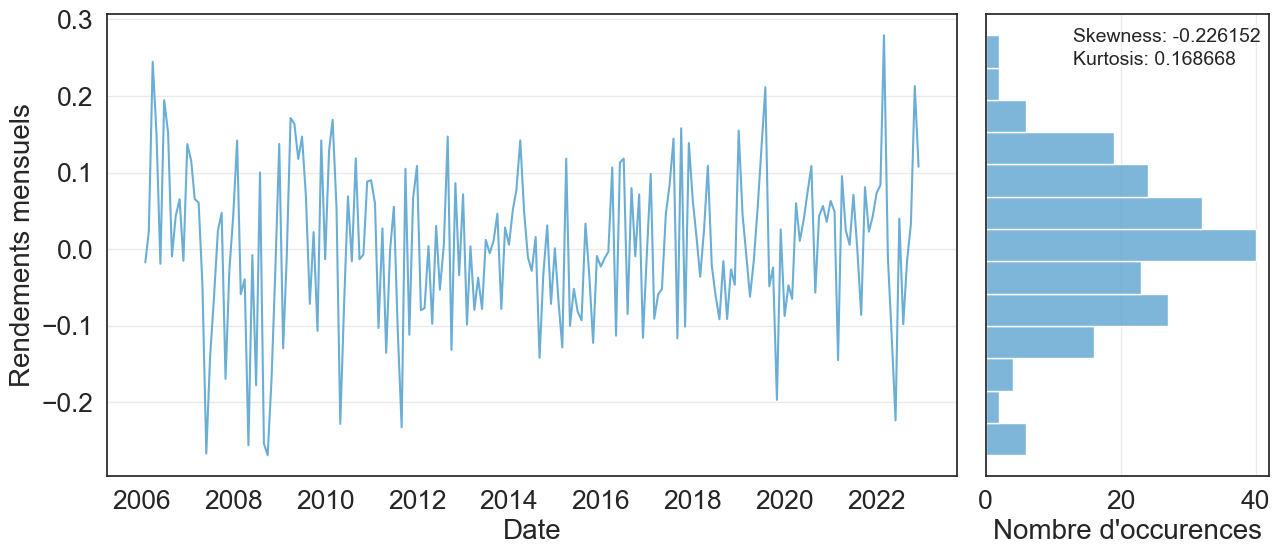

In [479]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6),gridspec_kw={'width_ratios': [3, 1]})
sns.lineplot(rendement_nickel,legend=False,palette='Blues',ax=axs[0])
axs[0].set_xlabel("Date",fontsize=20)
axs[0].set_ylabel("Rendements mensuels" ,fontsize=20)
axs[0].grid(axis='y', alpha=0.4)
axs[0].grid(axis='x', alpha=0)
sns.histplot(data=rendement_nickel,y='nickel',legend=False,color='#539ecd', stat='count',ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Nombre d'occurences",fontsize=20)
axs[1].set_yticks([])
axs[1].grid(axis='x', alpha=0.4)
axs[1].text(x=13, y=0.27, s="Skewness: %f" % rendement_nickel.skew(), fontsize=14)
axs[1].text(x=13, y=0.24, s="Kurtosis: %f" % rendement_nickel.kurt(),fontsize=14)
axs[1].tick_params(labelsize=19)
axs[0].tick_params(labelsize=19)
plt.subplots_adjust(wspace=0.05)
#plt.savefig('../rendu/graphs/nickel_rendement.pgf',  bbox_inches = 'tight')

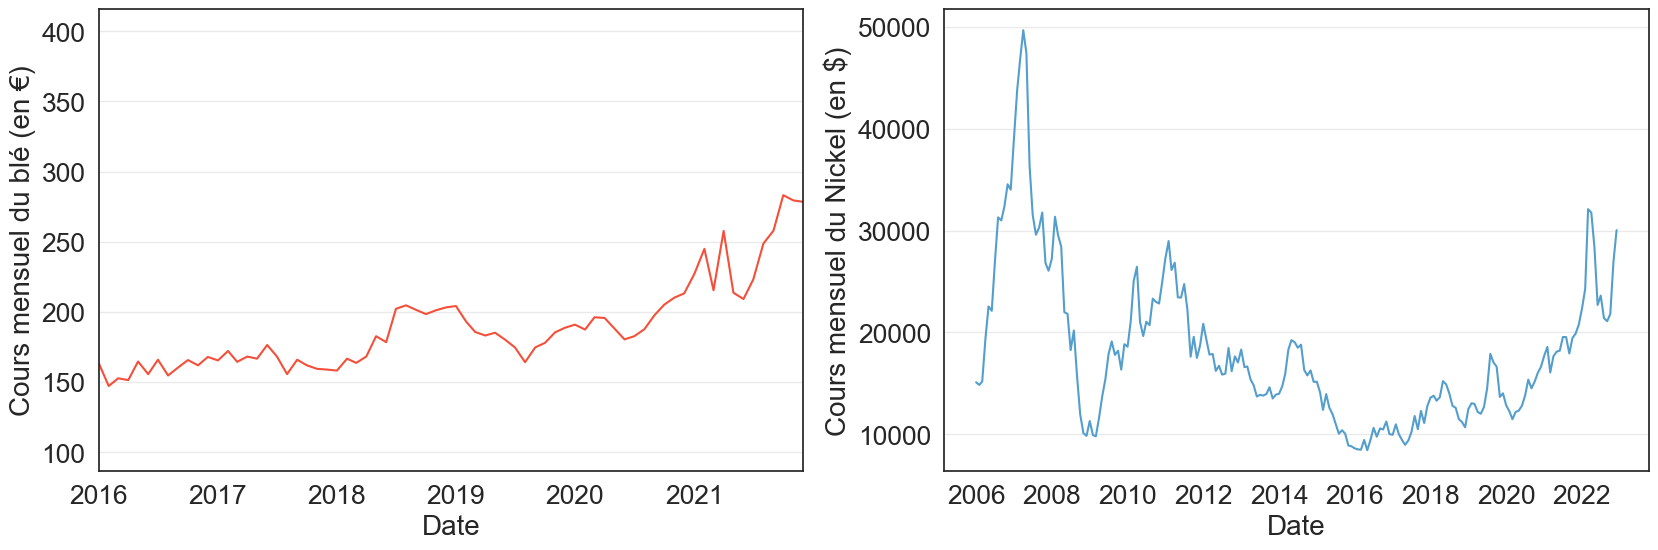

In [480]:


fig, axs = plt.subplots(1,2,figsize=(20, 6))
sns.lineplot(ble['ble'] ,color='#f44f39', ax=axs[0])
axs[0].set_xlabel("Date",fontsize=20)
axs[0].set_ylabel("Cours mensuel du blé (en €)" ,fontsize=20)
axs[0].grid(axis='y', alpha=0.4)
axs[0].grid(axis='x', alpha=0)
axs[0].set(xlim=(dates[0], dates[-1]))
sns.lineplot(nickel['nickel'], color='#539ecd', ax=axs[1])
axs[1].set_xlabel("Date",fontsize=20)
axs[1].set_ylabel("Cours mensuel du Nickel (en $)" ,fontsize=20)
axs[1].grid(axis='y', alpha=0.4)
axs[1].grid(axis='x', alpha=0)
axs[1].tick_params(labelsize=19)
axs[0].tick_params(labelsize=19)
#plt.savefig('../rendu/graphs/cours_historiques.pgf',  bbox_inches = 'tight')

# Desaiso nickel

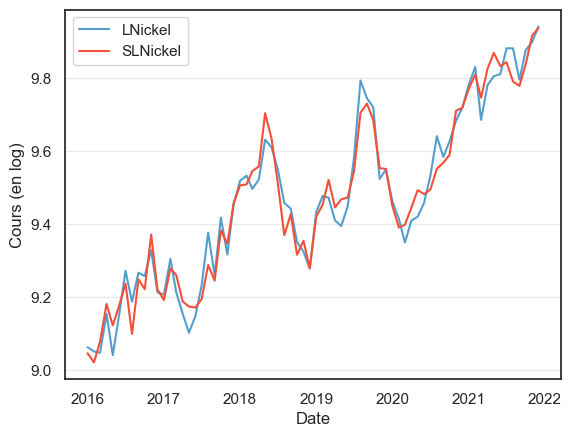

In [547]:
nickel_desaiso = pd.read_csv('data/nickel_desaiso.csv')
nickel_desaiso = nickel_desaiso.set_index(dates)
labels=['LNickel','SLNickel']
fig,ax = plt.subplots()
ax.plot(nickel_desaiso['lnickel'], color='#539ecd')
ax.plot(nickel_desaiso['nickel_desaiso'], color='#f44f39')
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
ax.set_xlabel("Date")
ax.set_ylabel("Cours (en log)")
ax.legend(labels,loc='upper left')
plt.savefig('../rendu/graphs/nickel_desaiso.pgf',  bbox_inches = 'tight')

# Prévisions